In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
dataset=pd.read_csv(r'C:\Users\Abhishek Padir\Desktop\cell_samples.csv')

In [41]:
dataset

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [42]:
dataset.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [43]:
dataset.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [48]:
dataset.shape

(699, 11)

In [8]:
dataset.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [9]:
dataset.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [10]:
dataset.nunique()

ID             645
Clump           10
UnifSize        10
UnifShape       10
MargAdh         10
SingEpiSize     10
BareNuc         11
BlandChrom      10
NormNucl        10
Mit              9
Class            2
dtype: int64

In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
UnifSize,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
UnifShape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
MargAdh,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
SingEpiSize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
BlandChrom,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
NormNucl,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mit,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [49]:
duplicate_dataset=dataset[dataset.duplicated()]
duplicate_dataset

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [50]:
def initial_eda(dataset):
    if isinstance(dataset, pd.DataFrame):
        total_na= dataset.isna().sum().sum()
        print("Total records", dataset.shape)
        print("Total number of NA: ", total_na)
        cols_name=dataset.columns
        dtype=dataset.dtypes
        duniq=dataset.nunique()
        na_val=dataset.isna().sum()
        print("Columns dataset","Datatype", "Unique dataset", "NA_vals")
        for i in range(len(dataset.columns)):
            print("%38s %10s %10s %10s"%(cols_name[i], dtype[i], duniq[i], na_val[i]) )
        else:
            print("error in code")

In [51]:
initial_eda(dataset)

Total records (699, 11)
Total number of NA:  0
Columns dataset Datatype Unique dataset NA_vals
                                    ID      int64        645          0
                                 Clump      int64         10          0
                              UnifSize      int64         10          0
                             UnifShape      int64         10          0
                               MargAdh      int64         10          0
                           SingEpiSize      int64         10          0
                               BareNuc     object         11          0
                            BlandChrom      int64         10          0
                              NormNucl      int64         10          0
                                   Mit      int64          9          0
                                 Class      int64          2          0
error in code


In [52]:
categorical=[i for i in dataset.columns if dataset[i].dtype == 'O']
print(categorical)

['BareNuc']


In [53]:
dataset[categorical].head()

,BareNuc
0,1
1,10
2,2
3,4
4,1


In [54]:
for i in categorical:
    print(dataset[i].value_counts())

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64


Text(0.5, 1.0, 'class Probability')

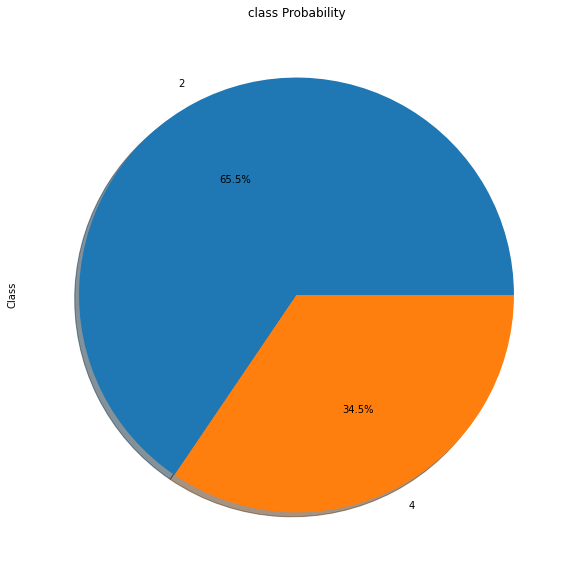

In [57]:
f, ax= plt.subplots(figsize=(10,10))
ax= dataset['Class'].value_counts().plot.pie(explode=[0,0],autopct = '%1.1f%%', shadow=True)
ax.set_title('class Probability')

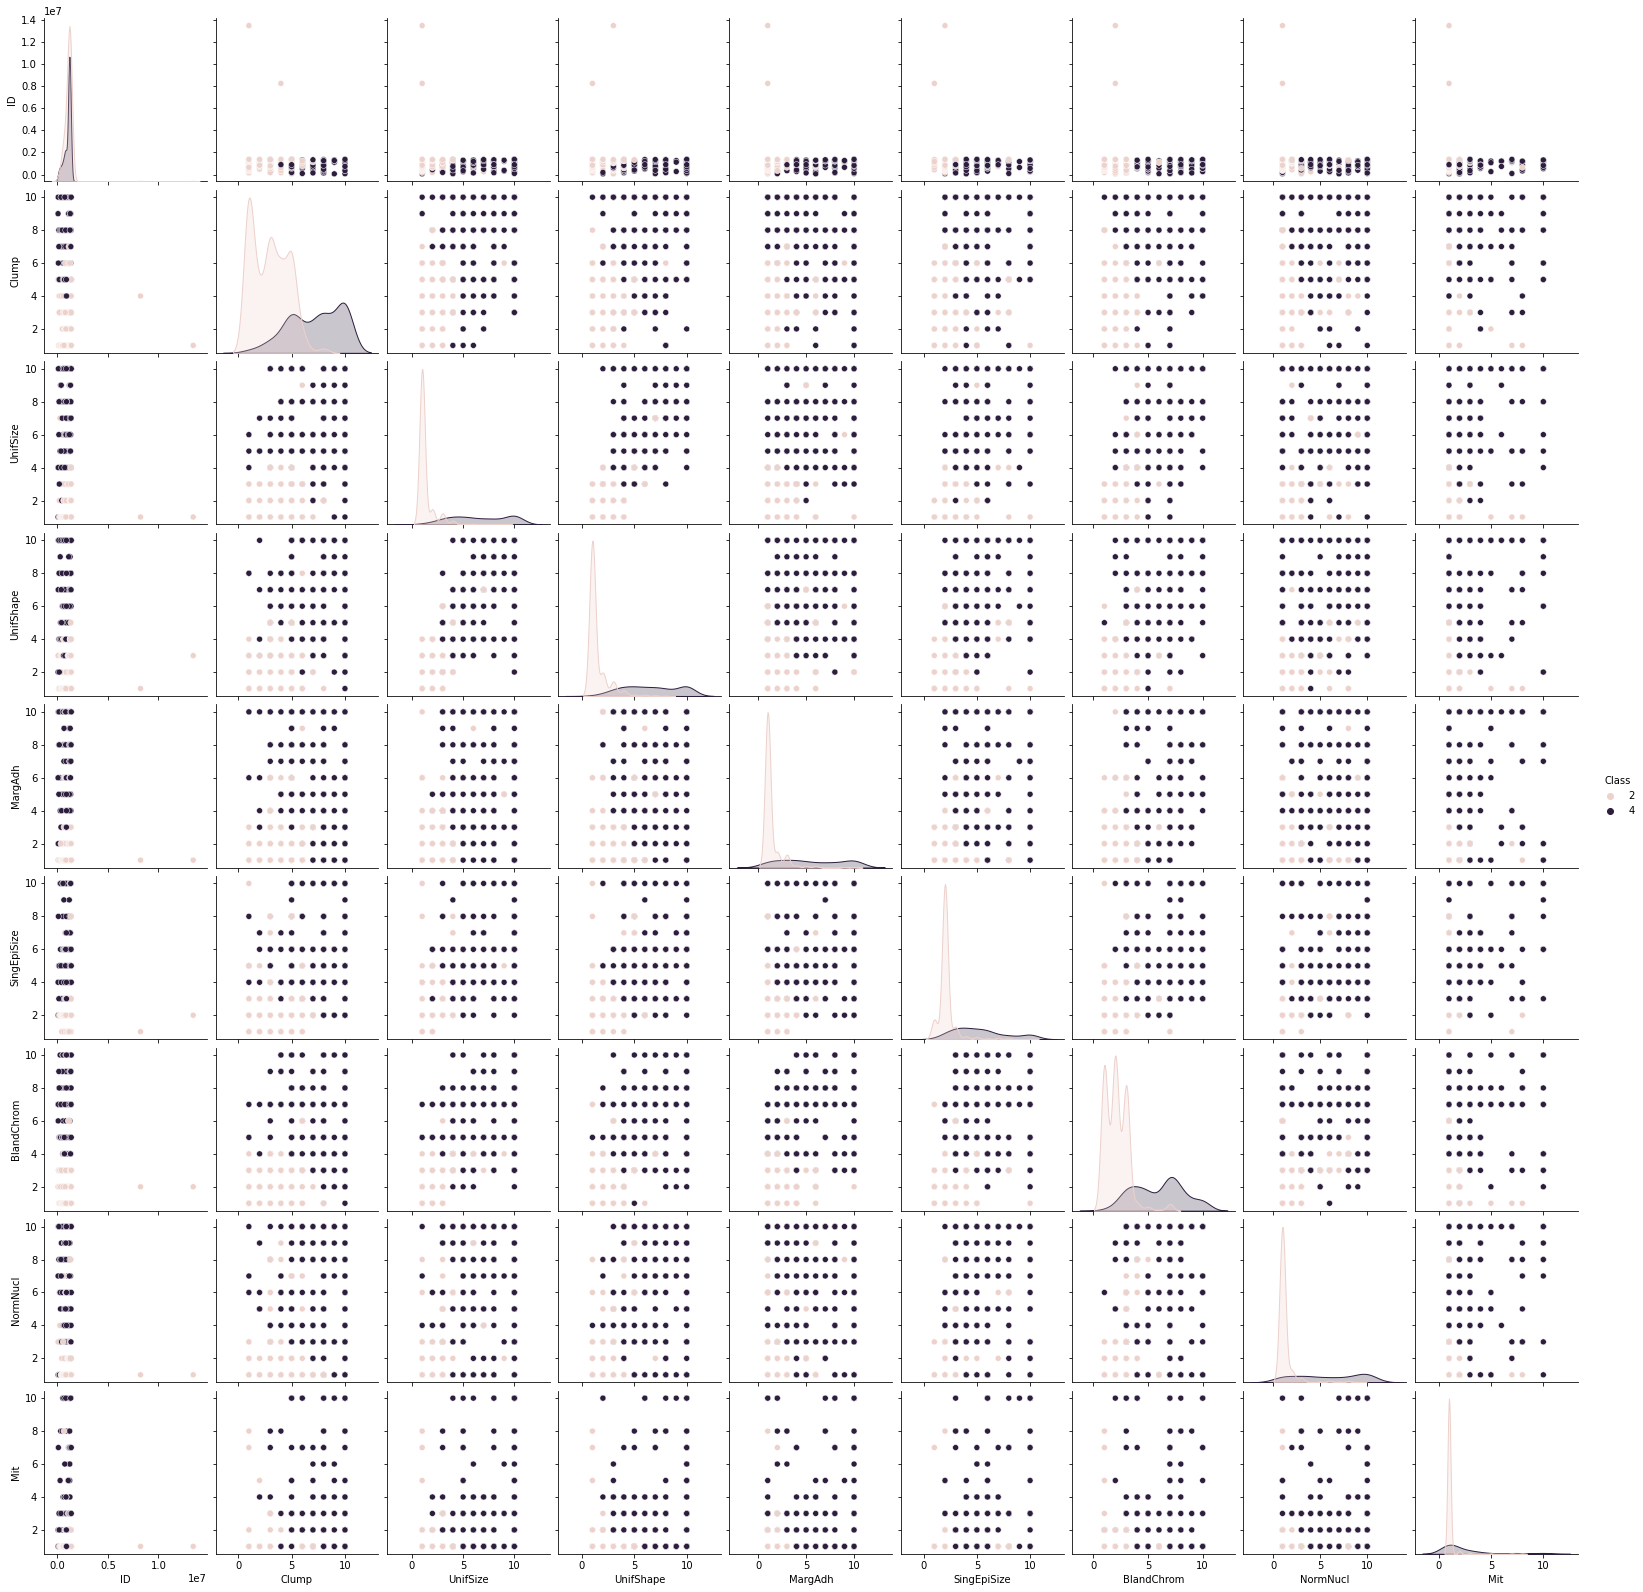

In [58]:
sns.pairplot(dataset,hue='Class')
plt.show()

<AxesSubplot:>

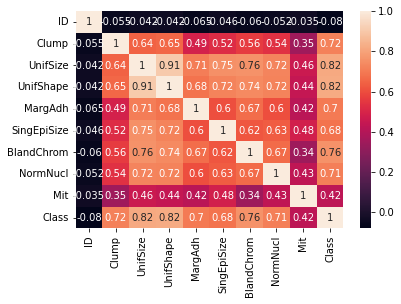

In [59]:
sns.heatmap(dataset.corr(), annot=True)

In [60]:
column_list=['Class']
x=dataset.drop(column_list,axis = 1)
y=dataset['Class']

In [61]:
print(x.columns)

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit'],
      dtype='object')


In [62]:
print(y)

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64


In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(559, 10) (140, 10)


In [64]:
encoder=ce.OrdinalEncoder(cols=['BareNuc'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

In [65]:
cols=X_train.columns
# X_train = pd.DataFrame(X_train, columns = X.columns)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])

In [66]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
score = accuracy_score(Y_test,y_pred)
print('randomforest classifier score: ',np.abs(score)*100)

randomforest classifier score:  97.14285714285714


In [69]:
y_pred

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2], dtype=int64)

In [70]:
feature_score=pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [71]:
print(feature_score)

UnifSize       0.254510
UnifShape      0.192918
BlandChrom     0.149614
SingEpiSize    0.133735
BareNuc        0.083903
NormNucl       0.078175
Clump          0.056446
ID             0.022464
MargAdh        0.022143
Mit            0.006092
dtype: float64


In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        95
           4       0.92      1.00      0.96        45

    accuracy                           0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140



In [88]:
column_list=['Mit','Class']
x=dataset.drop(column_list,axis = 1)
y=dataset['Class']

In [89]:
print(x.columns)

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl'],
      dtype='object')


In [90]:
print(y)

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64


In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(559, 9) (140, 9)


In [92]:
encoder=ce.OrdinalEncoder(cols=['BareNuc'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

In [93]:
cols=X_train.columns
# X_train = pd.DataFrame(X_train, columns = X.columns)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])

In [94]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
score = accuracy_score(Y_test,y_pred)
print('randomforest classifier score: ',np.abs(score)*100)

randomforest classifier score:  97.14285714285714


In [97]:
print(X_train[0:5])

         ID Clump UnifSize UnifShape   MargAdh SingEpiSize BareNuc BlandChrom  \
0 -0.065209  0.25     0.25     -0.25  0.000000         0.0     0.0   0.000000   
1 -0.158787  0.25     0.50      0.25  1.000000         0.0     0.5   0.000000   
2  0.146423 -0.75     0.00     -0.25  0.333333         0.0     0.0   0.000000   
3  0.403492  0.25     0.00     -0.25  0.000000         0.0     0.0  -0.333333   
4  0.047936 -0.50     0.00      0.25  0.333333         0.0     0.0  -0.333333   

  NormNucl  
0      0.0  
1      1.5  
2      0.0  
3      0.0  
4      0.0  


In [98]:
from xgboost import XGBRegressor

In [99]:
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [100]:
pred=model.predict(X_test)
print(pred)

[2.0195394 1.9998647 2.0008    4.0879617 2.0908153 1.9978614 2.901665
 4.019086  4.0821433 4.0262103 2.001182  4.0292826 2.0013227 2.2445908
 2.0009282 4.0369883 1.9999684 4.0758114 4.0321584 3.2646782 3.9948146
 1.9999197 3.260932  2.039729  2.8561409 2.0169375 2.0019267 3.933491
 2.7150335 3.852026  1.9998196 2.009251  1.9974705 3.7319136 2.0000958
 2.3959997 2.0003982 4.0497627 1.999235  4.0739026 2.0000799 3.3718247
 4.09892   1.9996496 2.0009282 2.3873444 2.383586  2.713858  1.7450019
 2.8865123 1.8682032 1.9998367 4.1069245 2.000342  3.834699  1.6166649
 2.3873444 3.9858823 1.9991698 2.001839  1.9999524 2.0696824 4.018375
 2.0974662 2.0006387 2.0010962 3.950959  4.153777  2.598843  2.0110097
 4.0394144 2.118863  4.0821595 2.000135  2.000635  2.0055907 1.9999061
 2.6663086 2.2954342 2.0010622 2.0019567 2.001182  2.0366757 2.0520248
 1.999356  4.03177   4.0980806 1.8886546 2.000417  2.0020034 1.9912409
 1.9863353 4.062837  2.3656664 2.7547472 4.0182667 2.001839  2.135383
 2.3867443

In [101]:
from sklearn import metrics

In [102]:
mae=metrics.mean_absolute_error(Y_test,pred)

In [103]:
print("Mean absolute error", mae)

Mean absolute error 0.18677103689738683
